In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pstore = pd.read_csv("googleplaystore.csv")
pstore.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
pstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
pstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
pd.isna(pstore)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print("Total Null values count: ",
      pstore.isnull().sum().sum())

Total Null values count:  1487


In [7]:
df = pstore.dropna()
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [8]:
#pstore = pstore.drop('Rating')

In [9]:
pstore.Category

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [10]:
from collections import Counter

#subset.pstore.count()
pstore.isin(['Category']).sum(axis=0)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:

ps=pstore.groupby('Category')['Content Rating'].value_counts()

print(ps)

Category           Content Rating
ART_AND_DESIGN     Everyone          61
                   Teen               3
                   Everyone 10+       1
AUTO_AND_VEHICLES  Everyone          83
                   Everyone 10+       1
                                     ..
VIDEO_PLAYERS      Everyone 10+       2
WEATHER            Everyone          78
                   Teen               2
                   Everyone 10+       1
                   Mature 17+         1
Name: Content Rating, Length: 118, dtype: int64


In [12]:
cp=pstore.Category[1:1972]
cp.sum()




'ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO_AND_VEHICLESAUTO

<AxesSubplot:>

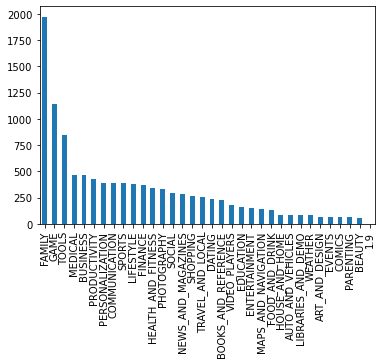

In [13]:
%matplotlib inline

dc=pstore['Category'].value_counts()
dc.plot(kind='bar')

In [14]:
pstore.Category.describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [15]:
pstore[['Installs']]

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
...,...
10836,"5,000+"
10837,100+
10838,"1,000+"
10839,"1,000+"


In [16]:

##pstore.nunique()
pstore[['Rating']]

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


In [17]:
pstore.loc[pstore.Rating>=19.0]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
print("High rating ",pstore.Rating.max())
pc=pstore.App.max()
print("Best app so for used",pc)
print("installs of app",pstore.Installs[:1])

High rating  19.0
Best app so for used 🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
installs of app 0    10,000+
Name: Installs, dtype: object


In [19]:
pstore.Installs.unique

<bound method Series.unique of 0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object>

In [20]:
f=pstore[['Installs']]
f

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
...,...
10836,"5,000+"
10837,100+
10838,"1,000+"
10839,"1,000+"


In [21]:
f.describe()

,Installs
count,10841
unique,22
top,"1,000,000+"
freq,1579


In [22]:
column = pstore["Installs"]
max_value = column.max()
print(max_value)

Free


In [23]:
c=pstore["Installs"]
c.count()

10841

In [24]:
pstore.loc[pstore.Rating<=3.8,'Category']

6             ART_AND_DESIGN
15            ART_AND_DESIGN
35            ART_AND_DESIGN
43            ART_AND_DESIGN
51         AUTO_AND_VEHICLES
                ...         
10782                   GAME
10819    BOOKS_AND_REFERENCE
10828                 COMICS
10830     NEWS_AND_MAGAZINES
10832                WEATHER
Name: Category, Length: 1612, dtype: object

In [25]:
group=pstore.groupby(['Category','Rating'])

In [26]:
group.count()

App  Reviews  Size  Installs  Type  Price  \
Category       Rating                                              
1.9            19.0      1        1     1         1     1      1   
ART_AND_DESIGN 3.2       1        1     1         1     1      1   
               3.4       1        1     1         1     1      1   
               3.8       3        3     3         3     3      3   
               3.9       2        2     2         2     2      2   
...                    ...      ...   ...       ...   ...    ...   
WEATHER        4.4      14       14    14        14    14     14   
               4.5      13       13    13        13    13     13   
               4.6       3        3     3         3     3      3   
               4.7       3        3     3         3     3      3   
               4.8       3        3     3         3     3      3   

                       Content Rating  Genres  Last Updated  Current Ver  \
Category       Rating                                                      
1.9            19.0                 0       1             1            1   
ART_AND_DESIGN 3.2                  1       1             1            0   
               3.4                  1       1             1            1   
               3.8                  3       3             3            3   
               3.9                  2       2             2            2   
...                               ...     ...           ...          ...   
WEATHER        4.4                 14      14            14           14   
               4.5                 13      13            13           13   
               4.6                  3       3             3            3   
               4.7                  3       3             3            3   
               4.8                  3       3             3            3   

                       Android Ver  
Category       Rating               
1.9            19.0              0  
ART_AND_DESIGN 3.2               1  
               3.4               1  
               3.8               3  
               3.9               2  
...                            ...  
WEATHER        4.4              14  
               4.5              13  
               4.6               3  
               4.7               3  
               4.8               3  

[770 rows x 11 columns]

In [27]:
pc=pstore.Rating.max()
pc

19.0

In [28]:
pstore.loc[pstore.Rating<=3.8]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
43,Paint Splash!,ART_AND_DESIGN,3.8,2206,1.2M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284,57M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [29]:
result=pstore.Category[:20].sum()

In [30]:
result


'ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_AND_DESIGN'

In [31]:
np.vstack(('Category'))

array([['C'],
       ['a'],
       ['t'],
       ['e'],
       ['g'],
       ['o'],
       ['r'],
       ['y']], dtype='<U1')

In [32]:
M=pstore.Category.describe()
M

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [39]:
Res=pstore[['Category','Rating','Installs']]
Res

,Category,Rating,Installs
0,ART_AND_DESIGN,4.1,"10,000+"
1,ART_AND_DESIGN,3.9,"500,000+"
2,ART_AND_DESIGN,4.7,"5,000,000+"
3,ART_AND_DESIGN,4.5,"50,000,000+"
4,ART_AND_DESIGN,4.3,"100,000+"
...,...,...,...
10836,FAMILY,4.5,"5,000+"
10837,FAMILY,5.0,100+
10838,MEDICAL,NaN,"1,000+"
10839,BOOKS_AND_REFERENCE,4.5,"1,000+"


In [40]:
Res.sum()

Category    ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_...
Rating                                                39279.0
Installs    10,000+500,000+5,000,000+50,000,000+100,000+50...
dtype: object

In [ ]:
sns.

In [41]:
pstore.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64